
<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/intro-Machine-Learning/blob/main/classes/class_16_end_to_end_1/class_16_end_to_end_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/marco-canas/intro-Machine-Learning/blob/main/classes/class_16_end_to_end_1/class_16_end_to_end_1.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table> 


### Regresión como cajas negras 

In [1]:
import pandas as pd
vivienda = pd.read_csv('housing.csv')


In [2]:
vivienda.head() 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
vivienda.rename(columns = {'longitude':'longitud','latitude':'latitud',\
                           'housing_median_age':'antiguedad','total_rooms':'total_salas',\
                           'total_bedrooms':'total_habitaciones',\
                           'population':'población','households':'n_hogares',\
                           'median_income':'ingresos','median_house_value':'valor_medio_casa',\
                           'ocean_proximity':'proximidad_playa'}, inplace = True)

In [4]:
vivienda.head() 

,longitud,latitud,antiguedad,total_salas,total_habitaciones,población,n_hogares,ingresos,valor_medio_casa,proximidad_playa
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
vivienda.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitud            20640 non-null  float64
 1   latitud             20640 non-null  float64
 2   antiguedad          20640 non-null  float64
 3   total_salas         20640 non-null  float64
 4   total_habitaciones  20433 non-null  float64
 5   población           20640 non-null  float64
 6   n_hogares           20640 non-null  float64
 7   ingresos            20640 non-null  float64
 8   valor_medio_casa    20640 non-null  float64
 9   proximidad_playa    20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
vivienda['proximidad_playa'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: proximidad_playa, dtype: int64

In [9]:
vivienda.describe() 

,longitud,latitud,antiguedad,total_salas,total_habitaciones,población,n_hogares,ingresos,valor_medio_casa
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


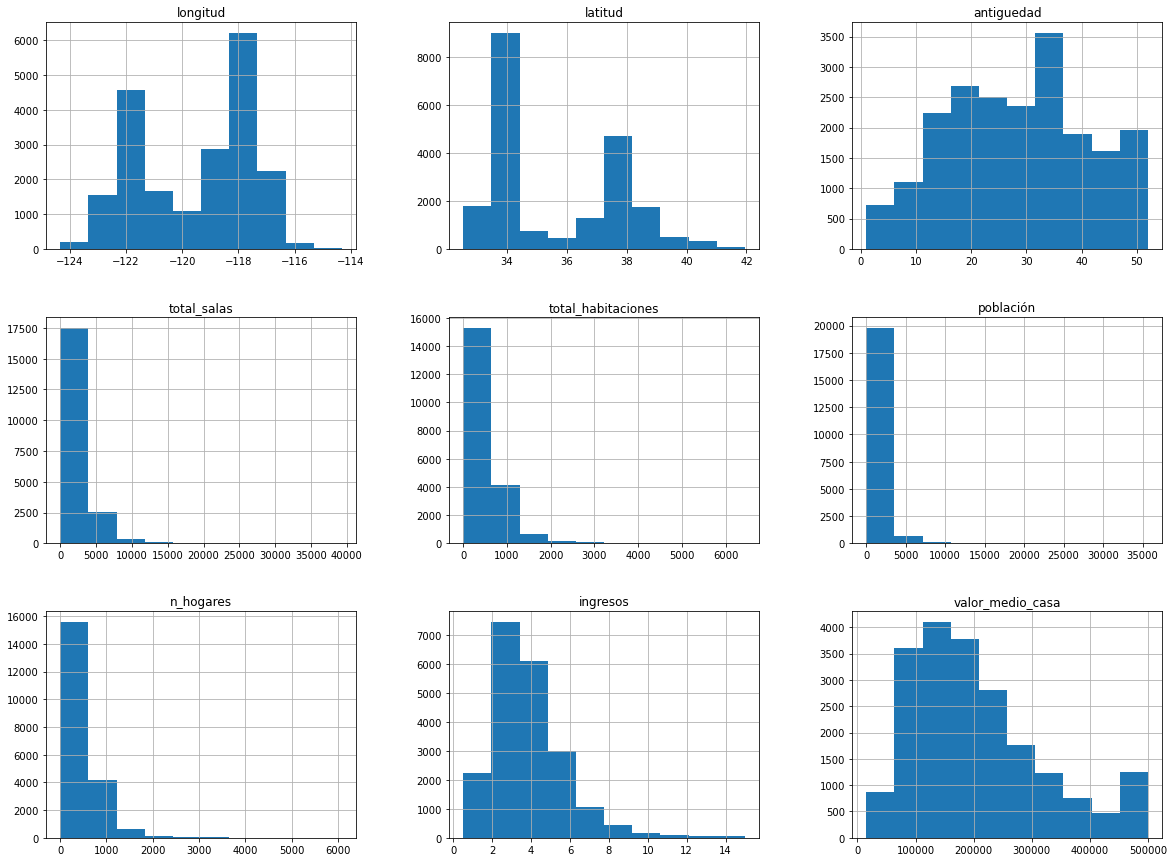

In [10]:
import matplotlib.pyplot as plt 
vivienda.hist(bins = 10, figsize = (20,15))
plt.show() 

In [14]:
import numpy as np 
def dividir_train_test(dataset, porcentaje_testeo):
    indices_barajados = np.random.permutation(list(range(len(dataset))))
    return indices_barajados 

In [16]:
list(range(len(vivienda))) 

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [15]:
dividir_train_test(vivienda, 0.2) 

array([17700, 16806,  2744, ..., 19140, 11261, 19355])

In [20]:
import numpy as np 
def dividir_train_test(dataset, porcentaje_testeo):
    indices_barajados = np.random.permutation(list(range(len(dataset))))
    tamaño_conjunto_entrenamiento = int(len(dataset)*(1-porcentaje_testeo))
    tamaño_conjunto_testeo = int(len(dataset)*porcentaje_testeo)
    return tamaño_conjunto_entrenamiento, tamaño_conjunto_testeo   

In [21]:
dividir_train_test(vivienda, 0.2) 

(16512, 4128)

In [25]:
def dividir_train_test(dataset, porcentaje_testeo):
    indices_barajados = np.random.permutation(list(range(len(dataset))))
    tamaño_conjunto_entrenamiento = int(len(dataset)*(1-porcentaje_testeo))
    tamaño_conjunto_testeo = int(len(dataset)*porcentaje_testeo)
    train_set = dataset.iloc[:tamaño_conjunto_entrenamiento] 
    test_set = dataset.iloc[tamaño_conjunto_entrenamiento:]
    return train_set, test_set 

In [26]:
vivienda_train, vivienda_test = dividir_train_test(vivienda, 0.2) 

In [27]:
vivienda_train 

,longitud,latitud,antiguedad,total_salas,total_habitaciones,población,n_hogares,ingresos,valor_medio_casa,proximidad_playa
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
16507,-121.11,37.74,11.0,3886.0,599.0,1605.0,529.0,4.4213,182700.0,INLAND
16508,-121.10,37.80,35.0,1853.0,331.0,958.0,340.0,3.3578,149000.0,INLAND
16509,-121.11,37.76,22.0,2606.0,411.0,1252.0,397.0,4.1833,192100.0,INLAND
16510,-121.16,37.73,7.0,4956.0,941.0,3006.0,915.0,3.4426,139000.0,INLAND


In [28]:
len(vivienda_train)

16512

In [30]:
len(vivienda_test) 

4128

In [31]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(vivienda, test_size=0.2, random_state=42)

## Visualización

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

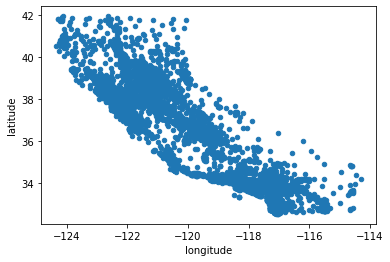

In [28]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude')

In [33]:
corr_matrix = vivienda.corr() 

In [34]:
corr_matrix 

,longitud,latitud,antiguedad,total_salas,total_habitaciones,población,n_hogares,ingresos,valor_medio_casa
longitud,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitud,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
antiguedad,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_salas,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_habitaciones,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
población,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
n_hogares,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
ingresos,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
valor_medio_casa,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [36]:
corr_matrix['valor_medio_casa'].sort_values(ascending = False) 

valor_medio_casa      1.000000
ingresos              0.688075
total_salas           0.134153
antiguedad            0.105623
n_hogares             0.065843
total_habitaciones    0.049686
población            -0.024650
longitud             -0.045967
latitud              -0.144160
Name: valor_medio_casa, dtype: float64

In [32]:
from pandas.plotting import scatter_matrix

In [38]:
atributos = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age'] 

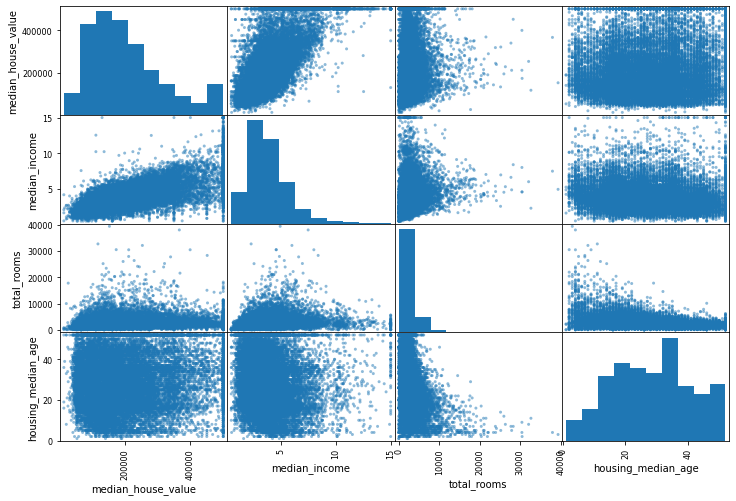

In [40]:
scatter_matrix(housing[attributes], figsize = (12,8)) 

plt.show() 

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

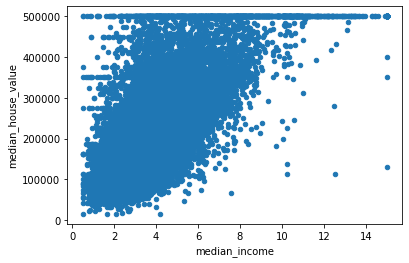

In [42]:
vivienda.plot(kind = 'scatter', x = 'median_income', y = 'median_house_value') 

## Prepare the Data for Machine Learning Algorithms

In [43]:
#housing.dropna(subset=["total_bedrooms"]) # option 1
#housing.drop("total_bedrooms", axis=1) # option 2
median = housing["total_bedrooms"].median() # option 3
housing["total_bedrooms"].fillna(median, inplace=True)

In [44]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [45]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [46]:
imputer.fit(housing_num)


SimpleImputer(strategy='median')

In [47]:
imputer.statistics_

array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05])

In [48]:
housing_num.median().values


array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05])

In [49]:
X = imputer.transform(housing_num)

In [50]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
index=housing_num.index)


## Handling Text and Categorical Attributes


In [53]:
housing_cat = housing[['ocean_proximity']] 
housing_cat.head(10) 

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
5,NEAR BAY
6,NEAR BAY
7,NEAR BAY
8,NEAR BAY
9,NEAR BAY


In [55]:
from sklearn.preprocessing import OrdinalEncoder 

In [56]:
ordinal_encoder = OrdinalEncoder() 


In [57]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [59]:
housing_cat_encoded[:10] 

array([[3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.]])

In [60]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## Custom Transformers


## Feature Scaling

## Chapter 4. Training Models

Hasta ahora, hemos tratado los modelos de Machine Learning y sus algoritmos de entrenamiento en su mayoría como cajas negras.

* optimizar un sistema de regresión, 
* mejoró un clasificador de imágenes de dígitos e incluso construyó un clasificador de spam desde cero,   

todo esto sin saber cómo funcionan realmente.

De hecho, en muchas situaciones no es necesario conocer los detalles de implementación.

Sin embargo, tener una buena comprensión de cómo funcionan las cosas puede ayudarlo a encontrar rápidamente el modelo apropiado, el algoritmo de entrenamiento adecuado para usar y un buen conjunto de hiperparámetros para su tarea.
 
Comprender qué hay debajo del capó también lo ayudará a depurar problemas y realizar análisis de errores de manera más eficiente. Por último, la mayoría de los temas discutidos en este capítulo serán esenciales para comprender, construir y entrenar redes neuronales (discutidos en la Parte II de este libro).

En este capítulo, comenzaremos analizando el modelo de regresión lineal, uno de los modelos más simples que existen. Hablaremos de dos formas muy diferentes de entrenarlo:

## Referencias  

* Regresión lineal desde Géron: https://github.com/ageron/handson-ml/blob/master/04_training_linear_models.ipynb  